In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

import keijzer_exogan as ke

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab

# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks') 

In [2]:
%%time
path = '/datb/16011015/ExoGAN_data/selection//'
data = np.load(path+'first_chunks_25_percent.npy')
np.random.shuffle(data) # shuffle the array, make sure the distribution is random (by index atleast)



CPU times: user 49.3 s, sys: 11.9 s, total: 1min 1s
Wall time: 1min 1s


In [3]:
"""
data contains 10k dictionaries of 50 chunks
"""
data.shape

(50, 25000)

In [4]:
data = data.flatten()

#data = data[:100000]

data.shape

(100000,)

# Plot spectra

In [5]:
wavelengths = ke.load_wavelengths()

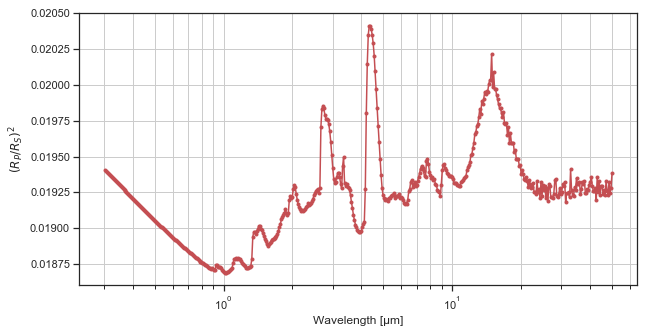

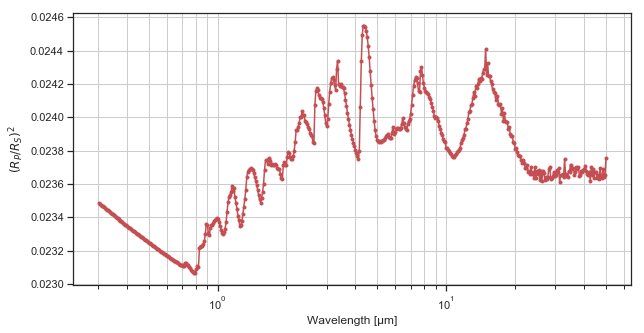

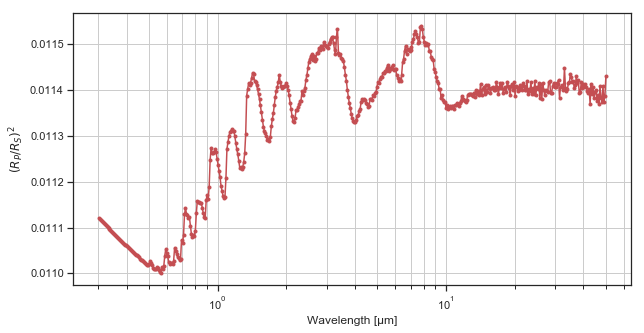

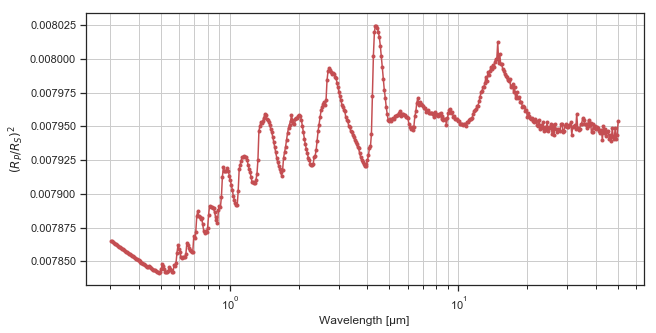

In [6]:
n = 4 # number of spectra to plot

indices = np.random.randint(0, len(data), size=n)

spectra = [data[i]['data']['spectrum'] for i in indices] # load the n randomly selected spectra into an array

df = pd.DataFrame(spectra).T # take the transpose so axis 0 are the R/R values
df['x'] = wavelengths


for i in range(n):
    ke.plot_spectrum(df.x, df[i])

(0.015, 0.03)

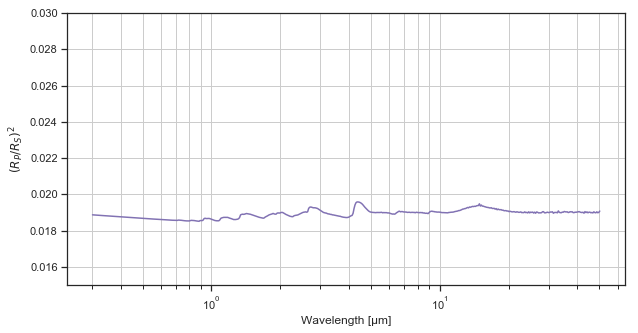

In [7]:
"""
Do the same thing but put it in one figure (with more spectra)
"""

# Grab a new sample

n = 5 # number of spectra to plot

indices = np.random.randint(0, len(data), size=n)

spectra = [data[i]['data']['spectrum'] for i in indices] # load the n randomly selected spectra into an array

df = pd.DataFrame(spectra).T # take the transpose so axis 0 are the R/R values
df['x'] = wavelengths

i=0
y = df[i].values.reshape(-1,1)
y.shape

# Plot the sample

plt.figure(figsize=(10,5))

for i in range(n):
    plt.plot(df.x, df[i])
    
plt.xlabel(r'Wavelength [µm]')
plt.ylabel(r'$(R_P / R_S)^2$')

plt.grid(True, which="both", ls='-')
    

plt.xscale('log')

plt.ylim((0.015,0.03))

(0.3, 16)

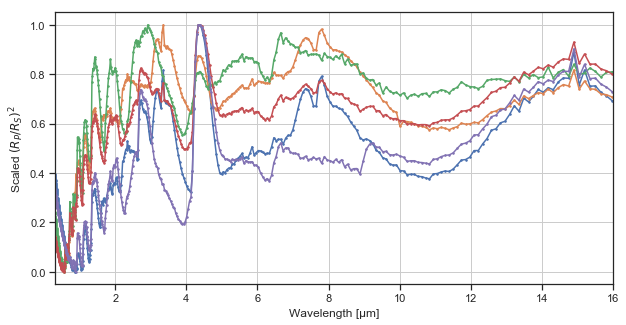

In [ ]:
plt.figure(figsize=(10,5))

for i in range(n):
    y = df[i].values.reshape(-1,1)
    scaler = MinMaxScaler(feature_range=(0,1)).fit(y)
    y = scaler.transform(y)

    plt.plot(df.x, y, '.-', ms=3)
    
plt.xlabel(r'Wavelength [µm]')
plt.ylabel(r'Scaled $(R_P / R_S)^2$')

plt.grid(True, which="both", ls='-')


#plt.xscale('log')

plt.xlim((0.3,16))

# Look at the params

In [ ]:
params = [pd.DataFrame(data[i]['param'], index=[0]) for i in tqdm(range(len(data)))]

 65%|██████▍   | 64685/100000 [00:35<00:18, 1945.35it/s]

In [ ]:
%%time
params = pd.concat(params)
params.head()

In [ ]:
params.info()

In [ ]:
params.describe()

In [ ]:
# Transform mixratios to logarithmic

for param in params:
    if 'mixratio' in param:
        params[param] = np.log(params[param])

params.describe()

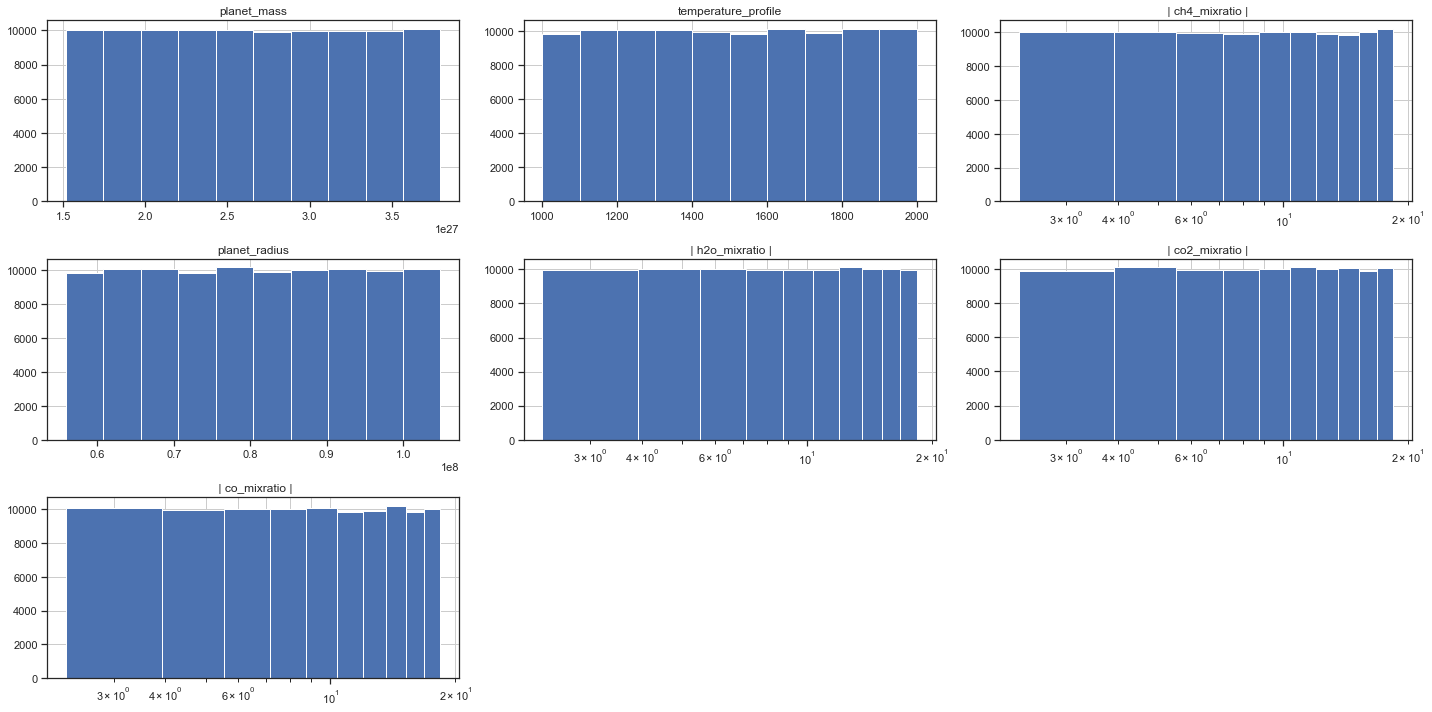

In [14]:
plt.figure(figsize=(20,10))

for i, param in enumerate(params.columns):
    plt.subplot(3,3,i+1)
    plt.grid(True, which="both", ls='-')
    
    if 'mixratio' in param:
        plt.title(r' | %s |' % param)
        plt.hist(np.abs(params[param]), bins=10)
        plt.xscale('log')
    else:
        plt.title(param)
        plt.hist(params[param], bins=10)

plt.tight_layout()

In [15]:
params.describe()

planet_mass  temperature_profile   ch4_mixratio  planet_radius  \
count  1.000000e+05        100000.000000  100000.000000   1.000000e+05   
mean   2.656431e+27          1501.428889     -10.368797   8.044588e+07   
std    7.276647e+26           319.313252       5.157277   1.560609e+07   
min    1.518400e+27          1000.000000     -18.420681   5.592880e+07   
25%    2.024533e+27          1222.222222     -14.838882   6.680384e+07   
50%    2.530667e+27          1555.555556     -11.257083   8.311641e+07   
75%    3.289867e+27          1777.777778      -5.884384   9.399146e+07   
max    3.796000e+27          2000.000000      -2.302585   1.048665e+08   

        h2o_mixratio   co2_mixratio    co_mixratio  
count  100000.000000  100000.000000  100000.000000  
mean      -10.366433     -10.364266     -10.357532  
std         5.142531       5.138434       5.146360  
min       -18.420681     -18.420681     -18.420681  
25%       -14.838882     -14.838882     -14.838882  
50%       -11.257083     -11.257083      -9.466183  
75%        -5.884384      -5.884384      -5.884384  
max        -2.302585      -2.302585      -2.302585